<a href="https://colab.research.google.com/github/rita-milani/data_science_na_pratica/blob/master/Cell_theft_Rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criminality Data and Cell Phone Theft in Rio de Janeiro
In this project, we are going to work with a database containing data about violence in the state and city of Rio de Janeiro. The data was obtained from [ISP Dados](http://www.ispdados.rj.gov.br), organized by the Institute of Public Security from Rio de Janeiro. The database contains series about theft, homicide, hijack and others, and due to the size, we are going to select a specific topic to work with ahead.

As part of DSNP course, the aim of this project is to learn how to `manipulate data` in `Pandas` library, executing basic commands that are easily used in Excel, but require further coding skills in `Python`, like:

- Analyze database characteristics
- Adjust dates
- Remove unnecessary colums
- Select desired sets of rows and columns
- Select and work with specific series in a new DF
- Work with specific attributes as mean, max, min, moving average, percent change and so on.

### Importing Python libraries and reading the data file:



In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv")

### Adjusting the date column and assigning it to the df index
As the date is separated into `Year` and `Month` columns, we want to concatenate them using `pd.to_datetime`, so they are converted to `Datetime` format. Once the column with the new format is built, we use it as the dataframe index and remove or `drop` the Year and Month columns:

In [0]:
# corrigir o formato da data para datetime e eliminar as colunas de data desnecessárias
df.index = pd.to_datetime(df.vano.astype(str) + '-' + df.mes.astype(str))
df.drop(['vano','mes'], axis=1, inplace=True)

Next, we call the first 5 rows to check the dataframe content:

In [5]:
df.head()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
1991-01-01,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1991-02-01,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
1991-03-01,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
1991-04-01,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
1991-05-01,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Dataframe dimension
To check the dataframe dimensions, we use the `shape` method:

In [6]:
df.shape

(344, 54)

So we can see that the dataframe is constituted by 344 rows (entries) and 54 columns (variables).

### Null values
Next, we want to find out the share of `null values` inside the dataframe. As we can see from the first 5 rows above, there are some series without inputed data, or with `NaN`. This happens because the series for these variables began later than 1991. 

In [7]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
estelionato                   0.418605
furto_celular                 0.418605
sequestro_relampago           0.418605
furto_coletivo                0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
extorsao                      0.418605
estupro                       0.418605
pol_militares_mortos_serv     0.418605
pol_civis_mortos_serv         0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
ameaca                        0.279070
lesao_corp_morte              0.279070
sequestro                

There are many series with null values, possibly because the statistics began to be collected later. The variables related to bike theft, `roubo_bicicleta`, cell phones theft, `roubo_de_celular` and drug possession `posse_drogas`, are some examples. Due to this gap, we will see how to delimit the desired time frame for these series.

### Initial Exploratory Data Analysis

The function `describe` will be used to assess basic statistics, returning the `count`, `mean`, `standard deviation`, the `quartiles`, and `minimum` and `maximum` values.
As the dataframe contains several variables, we will select a group of selected variables in the next section for a detailed analysis.

In [8]:
df.describe()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000,285.500000,2788.500000,592.000000,4.500000,3.000000,717.500000,10.000000,149.500000,13.000000,1154.000000,9243.500000,1637.500000,10

For exercise purpose, we will take some variables to show that it is possible also to call these functions separately:

We will find the `mean` for the following variables:
- vehicles theft - `roubo_veiculo`
- vehicles sneak (theft without contact with the victim) - `furto_veiculos`
- vehicles recovery - `recuperacao_veiculos` 


In [9]:
mean_theft = df.roubo_veiculo.mean()
print(mean_theft)

2448.6976744186045


In [10]:
mean_sneak = df.furto_veiculos.mean()
print(mean_sneak)

1674.671511627907


In [11]:
mean_recovery = df.recuperacao_veiculos.mean()
print(mean_recovery)

1772.2383720930231


Now, we calculate the vehicle´s recovery index:

In [12]:
recov = mean_recovery/(mean_theft + mean_sneak)
print(recov)

0.42980346705075084


So, it´s possible to conclude that less than half of the stolen vehicles are recovered in Rio de Janeiro.

In [13]:
df.head()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
1991-01-01,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1991-02-01,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
1991-03-01,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
1991-04-01,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
1991-05-01,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


## Cell phone statistics
Proceeding with the project, we choose to analyze statistics for cell phone theft in Rio de Janeiro:

### Build a new dataframe


In [0]:
# select the desired columns in a new dataframe
df_cel = df[['roubo_celular', 'furto_celular']].copy()

###Plot the series
As we know the series began to be collected after 1991, let´s plot it to check the first year they were collected:

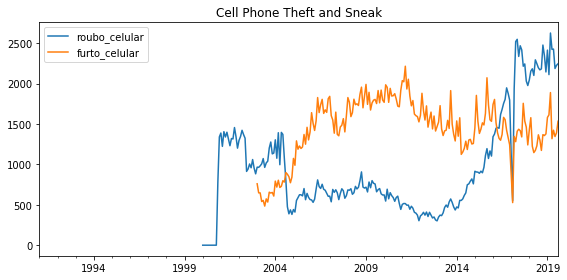

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
df_cel.plot(ax=ax)
ax.set_title("Cell Phone Theft and Sneak")

plt.tight_layout()

- cell phone theft series began to be registered after year 2000, while cell phone sneak series started in 2003. 
- it is possible to notice that both series have a **sharp decrease in February 2017**, that repeats only at this point. According to **ISP**, the **Civil Police strike** between January and March 2017 led to a reduction in theft register.

###Basic statistical analysis
A quick check on basic statistics using `describe` method: 

In [16]:
df_cel.describe()

,roubo_celular,furto_celular
count,236.000000,200.000000
mean,957.974576,1449.175000
std,624.309034,368.638776
min,0.000000,484.000000
25%,549.750000,1297.000000
50%,717.500000,1492.500000
75%,1306.750000,1731.250000
max,2626.000000,2215.000000


Then, we will plot the histogram to help with the stats analysis:

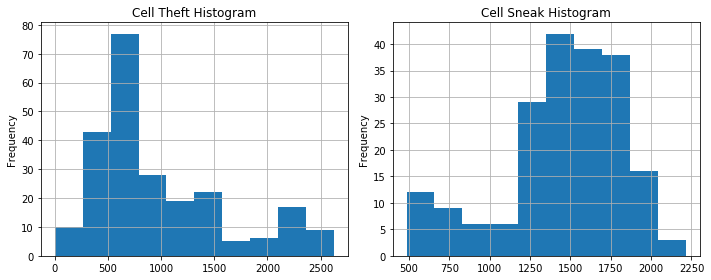

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

df_cel.roubo_celular.hist(ax=ax1)
ax1.set_title("Cell Theft Histogram")
ax1.set_ylabel("Frequency")
df_cel.furto_celular.hist(ax=ax2)
ax2.set_title("Cell Sneak Histogram")
ax2.set_ylabel("Frequency")

plt.tight_layout();

From the table and the histograms, we can notice different patterns for the series:
- Cell Theft has a distribution more **skewed to the right** (long tail of higher numbers), so the higher values pull the mean up, making it higher than the median => **mean > median**
- Cell Sneak has a distribution more **skewed to the left** (long tail of lower numbers). These low values pull the mean down, so the mean is slightly lower than the median => **mean < median**

###Data Manipulation
Next thing we will do is aggregate the values to 12 months to have an idea of percentual change on yearly basis:
- we aggregate the series using the `rolling` function, which performs the desired calculation along the series according to the desired time period, i.e., **moving sum** or **moving average**.
- we calculate the **percentual change** of the aggregated series using the `pct_change` function.

In [0]:
df_cel['rc12m'] = df_cel.roubo_celular.rolling(12).sum()
df_cel['fc12m'] = df_cel.furto_celular.rolling(12).sum()

In [0]:
df_cel['rc12mc'] = (df_cel.rc12m.pct_change(periods=12)*100)
df_cel['fc12mc'] = (df_cel.fc12m.pct_change(periods=12)*100)

###Plot the graphs
In order to better understand the yearly rates of change in the series, we plot the variation graphs.

Notice that we **delimit the timeframe** for the desired dates in order to avoid **null values** using `.loc` command.

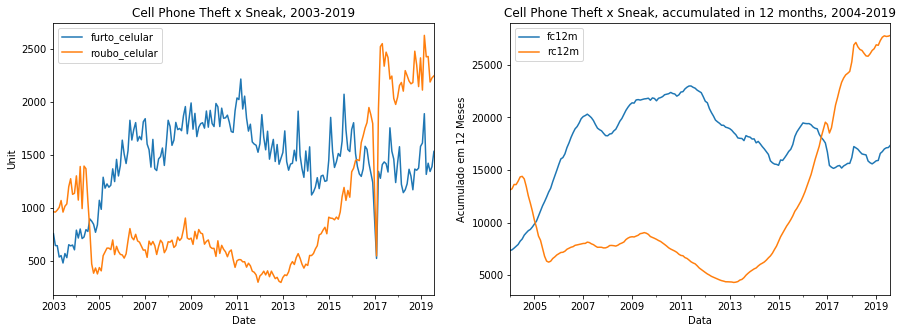

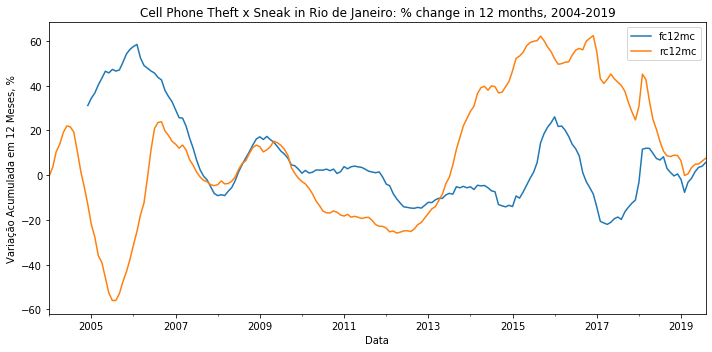

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

# plot theft x sneak graph
df_cel.loc['2003-01-01':'2019-12-01','furto_celular'].plot(kind='line', ax=ax1)
df_cel.loc['2003-01-01':'2019-12-01','roubo_celular'].plot(kind='line', ax=ax1)
ax1.set_title("Cell Phone Theft x Sneak, 2003-2019")
ax1.set_xlabel("Date")
ax1.set_ylabel("Unit")
ax1.legend()

# plot theft x sneak graph accumulated in 12 months
df_cel.loc['2004-01-01':'2019-12-01', 'fc12m'].plot(kind='line', ax=ax2)
df_cel.loc['2004-01-01':'2019-12-01', 'rc12m'].plot(kind='line', ax=ax2)
ax2.set_title("Cell Phone Theft x Sneak, accumulated in 12 months, 2004-2019")
ax2.set_xlabel("Data")
ax2.set_ylabel("Acumulado em 12 Meses")
ax2.legend()

fig, ax3 = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
# plot theft x sneak graph %12 month change
df_cel.loc['2004-01-01':'2019-12-01', 'fc12mc'].plot(kind='line', ax=ax3)
df_cel.loc['2004-01-01':'2019-12-01', 'rc12mc'].plot(kind='line', ax=ax3)
ax3.set_title("Cell Phone Theft x Sneak in Rio de Janeiro: % change in 12 months, 2004-2019")
ax3.set_xlabel("Data")
ax3.set_ylabel("Variação Acumulada em 12 Meses, %")
ax3.legend()


plt.tight_layout();


###Conclusion

We worked with an extense database about violence in Rio de Janeiro. We could check its basic characteristics, performing some useful Python commands. We cshowed also how to separate desired time series into a new dataframe to be worked with, and also how to perform basic statistical analysis and manipulate the graphs. 

Regarding the cell phone data, it is possible to notice that there was an inversion in trend during the past years, with mobile theft - which includes direct contact with the victim - surpassing sneak activity. The occurrence of direct theft using guns and also 'arrastão' - a modality in which a group of people invades an environment, like a beach, distracting and taking people´s goods, may be the reasons for this increase. 